In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler

In [31]:
# Membaca data dari file CSV
df = pd.read_csv('Breast_Cancer_Wisconsin_dataset.csv', sep=';')
# Menampilkan lima baris pertama dari dataset
print("Lima baris pertama dari dataset:")
print(df.head())

Lima baris pertama dari dataset:
   radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean
0        17.99         10.38          122.80     1001.0          0.11840
1        20.57         17.77          132.90     1326.0          0.08474
2        19.69         21.25          130.00     1203.0          0.10960
3        11.42         20.38           77.58      386.1          0.14250
4        20.29         14.34          135.10     1297.0          0.10030


In [43]:
# Memilih kolom yang akan digunakan untuk MLR
columns_to_use = ['smoothness_mean', 'texture_mean', 'perimeter_mean', 'area_mean']

In [44]:
# Memisahkan fitur dan target
X = df[columns_to_use]
y = df['radius_mean']

In [45]:
# Membagi data menjadi data pelatihan dan pengujian
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [46]:
# Menampilkan dimensi data pelatihan dan pengujian
print(f"Dimensi data pelatihan: X_train: {X_train.shape}, y_train: {y_train.shape}")
print(f"Dimensi data pengujian: X_test: {X_test.shape}, y_test: {y_test.shape}")

Dimensi data pelatihan: X_train: (80, 4), y_train: (80,)
Dimensi data pengujian: X_test: (20, 4), y_test: (20,)


In [47]:
# Standarisasi fitur
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [48]:
# Membuat model MLR
model = LinearRegression()

# Melatih model
model.fit(X_train_scaled, y_train)

# Memprediksi data pengujian
y_pred = model.predict(X_test_scaled)

In [49]:
y_pred

array([18.40236972, 15.10714919, 14.89152986, 12.64411509, 11.8588029 ,
       13.52789456,  9.6547523 , 14.67529346, 15.772887  , 18.37669284,
        8.8513787 , 11.7934666 , 12.84093503, 14.13512119,  9.81561688,
       20.5212851 , 17.67721291, 17.92473315, 18.09593883, 29.0247619 ])

In [50]:
# Menghitung dan menampilkan evaluasi model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("\nMean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared (R2):", r2)


Mean Squared Error (MSE): 0.0768420161416229
Mean Absolute Error (MAE): 0.1861257046772673
R-squared (R2): 0.9959963179126119


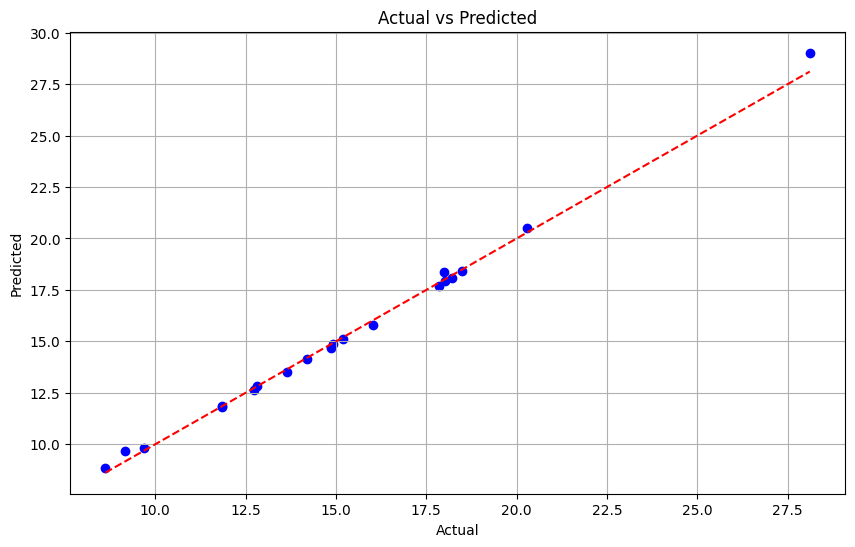

In [51]:
# Plot hasil prediksi
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], linestyle='--', color='red')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
plt.grid(True)
plt.show()

# Regression (with cross-validation)

Lima baris pertama dari dataset:
   radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean
0        17.99         10.38          122.80     1001.0          0.11840
1        20.57         17.77          132.90     1326.0          0.08474
2        19.69         21.25          130.00     1203.0          0.10960
3        11.42         20.38           77.58      386.1          0.14250
4        20.29         14.34          135.10     1297.0          0.10030
Dimensi data pelatihan: X_train: (80, 4), y_train: (80,)
Dimensi data pengujian: X_test: (20, 4), y_test: (20,)

Mean Squared Error (MSE): 0.0768420161416229
Mean Absolute Error (MAE): 0.1861257046772673
R-squared (R2): 0.9959963179126119

Cross-validation Mean Absolute Error (MAE): [0.16730554 0.1615834  0.12333046 0.12617453 0.08433966]
Cross-validation Mean Squared Error (MSE): [0.03677184 0.05987445 0.02760614 0.03661385 0.01142673]
Cross-validation R-squared (R2): [0.99706265 0.99709981 0.99773958 0.99708953 0.99917787

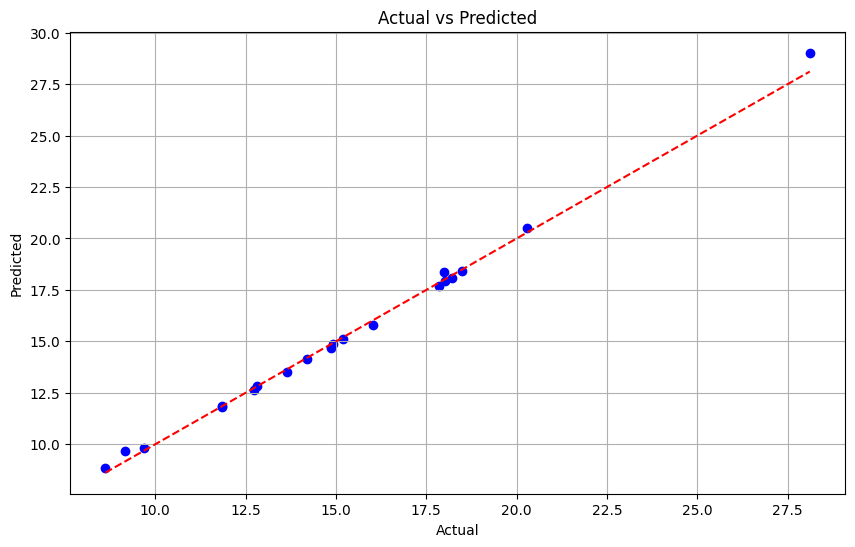

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# Membaca data dari file CSV
df = pd.read_csv('Breast_Cancer_Wisconsin_dataset.csv', sep=';')

# Menampilkan lima baris pertama dari dataset
print("Lima baris pertama dari dataset:")
print(df.head())

# Memilih kolom yang akan digunakan untuk MLR
columns_to_use = ['smoothness_mean', 'texture_mean', 'perimeter_mean', 'area_mean']
# Memisahkan fitur dan target
X = df[columns_to_use]
y = df['radius_mean']

# Membagi data menjadi data pelatihan dan pengujian
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Menampilkan dimensi data pelatihan dan pengujian
print(f"Dimensi data pelatihan: X_train: {X_train.shape}, y_train: {y_train.shape}")
print(f"Dimensi data pengujian: X_test: {X_test.shape}, y_test: {y_test.shape}")

# Membuat pipeline yang mencakup scaling dan model MLR
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('mlr', LinearRegression())
])

# Melatih model menggunakan data pelatihan
pipeline.fit(X_train, y_train)

# Memprediksi data pengujian
y_pred = pipeline.predict(X_test)

# Menghitung dan menampilkan evaluasi model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\nMean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared (R2):", r2)

# Melakukan validasi silang dengan 5 lipatan (folds) pada pipeline dan menghitung MAE, MSE, dan R-squared
cv_results = cross_validate(pipeline, X, y, cv=5, scoring=['neg_mean_absolute_error', 'neg_mean_squared_error', 'r2'])

print("\nCross-validation Mean Absolute Error (MAE):", -cv_results['test_neg_mean_absolute_error'])
print("Cross-validation Mean Squared Error (MSE):", -cv_results['test_neg_mean_squared_error'])
print("Cross-validation R-squared (R2):", cv_results['test_r2'])

print("\nMean Cross-validation Mean Absolute Error (MAE):", -np.mean(cv_results['test_neg_mean_absolute_error']))
print("Mean Cross-validation Mean Squared Error (MSE):", -np.mean(cv_results['test_neg_mean_squared_error']))
print("Mean Cross-validation R-squared (R2):", np.mean(cv_results['test_r2']))

# Plot hasil prediksi
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], linestyle='--', color='red')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
plt.grid(True)
plt.show()
